In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from jupyterthemes import jtplot
jtplot.style('oceans16')

%matplotlib inline

In [226]:
mean_phi = 5
sigma_phi = 1
phi_above = 5 # input from above level....

dt = 0.01
maxt = 20 # maximum time
trials = 1500
lrate = 0.01

In [227]:
sigma = np.zeros(trials)
error = np.zeros(int(maxt/dt))
e = np.zeros_like(error)
sigma[0] = abs(np.random.randn())
eps = 1e-5

In [228]:
for trial in range(1,trials):
    error[0] = 0
    e[0] = 0
    phi = mean_phi + np.sqrt(sigma_phi) * np.random.randn()
    
    for i in range(1, int(maxt/dt)):
        error[i] = (error[i-1] + dt * (phi - phi_above - e[i-1]))
        e[i] = (e[i-1] + dt * (sigma[trial-1] * error[i-1] - e[i-1]))
    
    sigma[trial] = sigma[trial-1] + lrate * (error[-1]*e[-1] - 1)

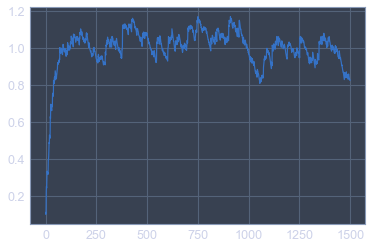

In [229]:
plt.plot(sigma)

C:\Users\ares\Anaconda3\envs\py35\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


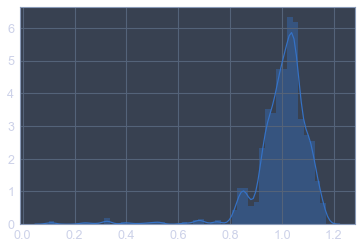

In [230]:
sns.distplot(sigma)